# Group CA- Engineers' Salaries In India

In [148]:
from IPython.core.display import Image
Image(url = 'https://collegelearners.com/wp-content/uploads/2021/02/master-of-engineering-science-swinburne.jpg')

Link to Github: https://github.com/EladTurgi1/DS_Salaries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

In [150]:
url = 'https://raw.githubusercontent.com/EladTurgi1/DS_Options/main/Engineering_graduate_salary.csv'
sal_df = pd.read_csv(url)

## הקדמה

בפרוייקט שלנו בחרנו לחקור נתונים הקשורים לשכר בוגרי תואר להנדסה בהודו. הנושא הזה עניין אותנו מכיוון שיש לזה קשר לעתיד המקצועי שלנו לאחר התואר.  

הדאטה שלנו נלקח מאתר קאגל וכולל נתונים רבים הכוללים: ממוצע הציונים של המהנדס כשהיה תלמיד בכיתה י', י"ב והאוניברסיטה, דירוג האוניברסיטה והשכר אותו מרוויחים. כמו כן, הדאטה מציג נתונים נוספים כמו ציונים במבחן אישיות המתבצע בהודו (אמקט)- הניקוד שקיבלו במספר קריטריונים במבחן זה מנבאים תכונות אופי לדוגמא- פתיחות לשינויים ויציבות נפשית.  

הקריטריונים שלפיהם ניתחנו את הנתונים (העמודות) מוצגים למטה:

In [151]:
sal_df.count()

ID                       2998
Gender                   2998
DOB                      2998
10percentage             2998
10board                  2998
12graduation             2998
12percentage             2998
12board                  2998
CollegeID                2998
CollegeTier              2998
Degree                   2998
Specialization           2998
collegeGPA               2998
CollegeCityID            2998
CollegeCityTier          2998
CollegeState             2998
GraduationYear           2998
English                  2998
Logical                  2998
Quant                    2998
Domain                   2998
ComputerProgramming      2998
ElectronicsAndSemicon    2998
ComputerScience          2998
MechanicalEngg           2998
ElectricalEngg           2998
TelecomEngg              2998
CivilEngg                2998
conscientiousness        2998
agreeableness            2998
extraversion             2998
nueroticism              2998
openess_to_experience    2998
Salary    

# Conclusion 1 - Correlation between agreeablness and openess to experience

בפסיכולוגיה, חמש התכונות הגדולות או מודל חמשת הגורמים הן חמש תכונות בעלות השפעה ניכרת על אישיות האדם ועל האופן שבו הוא מתנהג
.. 

א) מוחצנות- מופנמות הוא ציר תכונות המייצג את נטייתו של האדם להפנות אנרגיות כלפי חוץ
.

ב) נעימות- תכונת אישיות המתבטאת בהתנהגות האינדיבידואל אשר נצפית כאדיבות, סימפתיה, שיתוף פעולה, חמימות והתחשבות
.

ג) מצפוניות- מצפוניות (מתורגם גם כמוכוונות או אמינות) אל מול רשלנות מייצגת את נכונות הפרט לעבודה קשה, אחריות, מעשיות ויכולת להתמקד במטרה
.

ד) יציבות רגשית-נוירוטיות-יציבות רגשית אל מול נוירוטיות מייצגת את יכולתו של האדם להיות רגוע, בעל ביטחון עצמי וקר רוח
.

ה) פתיחות מחשבתית / פתיחות לחוויה- פתיחות מחשבתית או פתיחות לחוויה ולהתנסויות מייצגת יצירתיות ונכונות לחקור כיוונים אינטלקטואליים חדשים ולהתעניין בשלל תחומים





רצינו לבדוק האם יש קשר בין תכונות האופי השונות ולראות האם ריבוי נקודות בקטגוריה אחת משפיעה על קטגוריה אחרת

<AxesSubplot:>

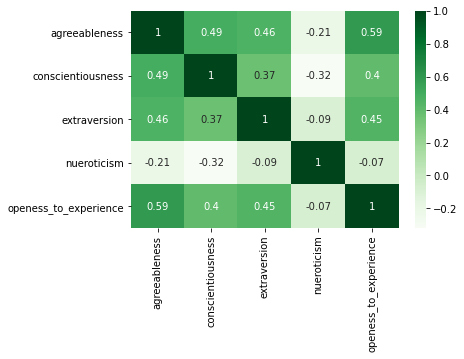

In [152]:
features = ['agreeableness', 'conscientiousness','extraversion','nueroticism','openess_to_experience']
correlation_matrix = sal_df[features].corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True)

מבין המדינות המפותחות בחרנו להתמקד בתמיל נדו:

In [153]:
sal_df_new = sal_df[sal_df['CollegeState'] == 'Tamil Nadu']

<AxesSubplot:>

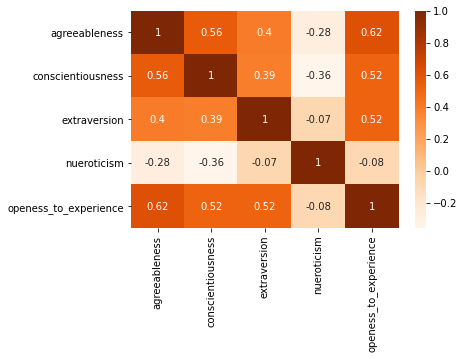

In [154]:
features = ['agreeableness', 'conscientiousness','extraversion','nueroticism','openess_to_experience']
correlation_matrix = sal_df_new[features].corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='Oranges', annot=True)

התרשים למטה מראה את הקורולוציות של המבחן רק אצל הנשים:

In [155]:
gender_x = sal_df_new[sal_df_new['Gender'] == 'f']

<AxesSubplot:>

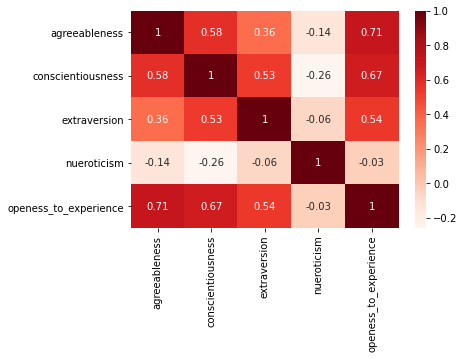

In [156]:
features = ['agreeableness', 'conscientiousness','extraversion','nueroticism','openess_to_experience']
correlation_matrix = gender_x[features].corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='Reds', annot=True)

התרשים למטה מראה את הקורולוציות של המבחן רק אצל הגברים:

<AxesSubplot:>

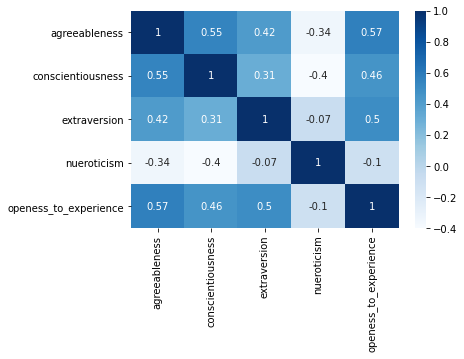

In [157]:
gender_y = sal_df_new[sal_df_new['Gender'] == 'm']
correlation_matrix1 = gender_y[features].corr().round(2)
sns.heatmap(data=correlation_matrix1,cmap='Blues', annot=True)

<AxesSubplot:xlabel='agreeableness', ylabel='openess_to_experience'>

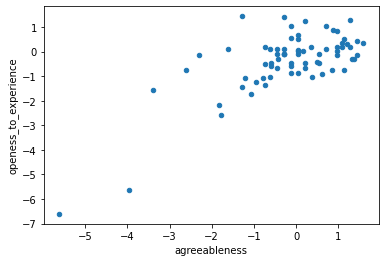

In [158]:
gender_x.plot.scatter(x='agreeableness', y='openess_to_experience')

#### מסקנה 1 - מכאן, ניתן לראות כי יש קשר בין התכונות: פתיחות לשינויים ונעימות, והוא חזק יותר אצל נשים 

# Conclusion 2 - Calculating the wage gap between men and women 
###### 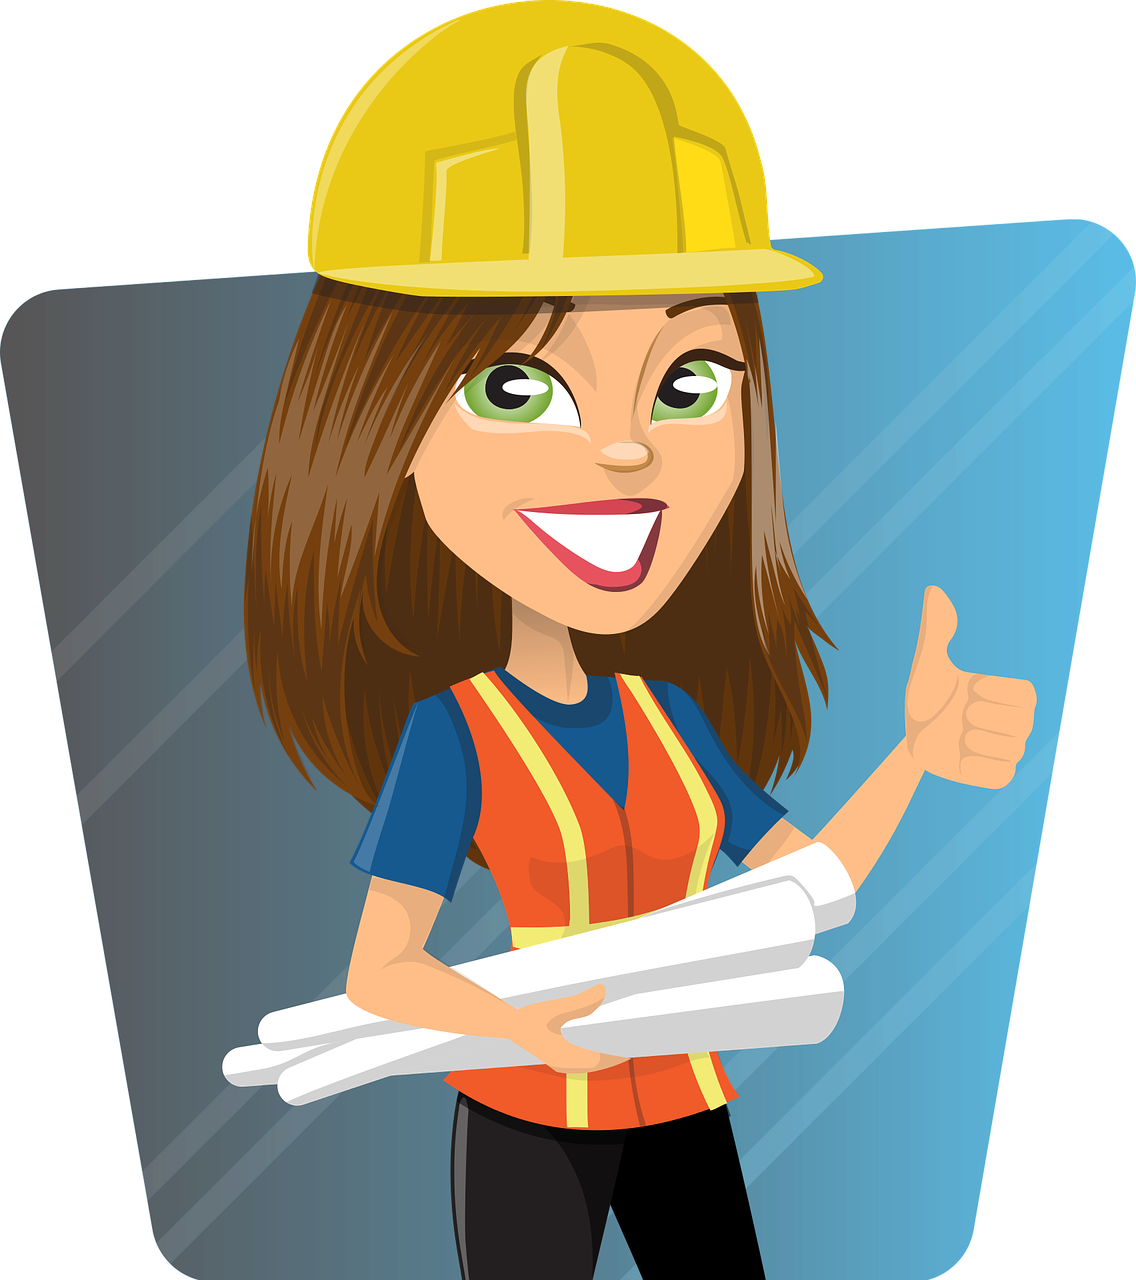

הודו ידועה כאחת הארצות בעלות הבדלים משמעותיים בשכר בין גברים ונשים.

רצינו לבדוק האם התקדמות והתפתחות המדינות בהודו משפיעה על הפערים בשכר המהנדסים-הגברים והנשים

ההשערה הייתה שפער השכר בין גברים ונשים יושפע ממצב הסוציואקונומי של המדינה (מדדנו לפי התוצר המקומי הגולמי (ג'י די פי)), ככל שהתוצר המקומי הגולמי גבוה יותר כך גם פער השכר יהיה קטן יותר או לטובת הנשים.   

כדי לבדוק את הג'י די פי נעזרנו במקור חיצוני שמצורף כאן:

https://in.finance.yahoo.com/news/richest-and-poorest-states-in-india-by-gdp-125011378.html

In [159]:
def subes(x,y):
    return x-y

In [160]:
genstate=sal_df.groupby(['CollegeState', 'Gender'])['Salary'].aggregate('median').unstack()
#genstate

In [161]:
genstate=genstate.dropna()

In [162]:
genstate["wagegap"]=subes(genstate["m"],genstate["f"])
#genstate

In [163]:
sortedgenstate = genstate.sort_values('wagegap', ascending=False)

In [164]:
locatpp = sal_df.groupby('Gender') [["10percentage","12percentage", "collegeGPA","Salary"]].mean()
locatpp

,10percentage,12percentage,collegeGPA,Salary
Gender,,,,
f,80.617067,77.118855,73.960140,290418.994413
m,76.740421,73.469500,70.741056,309804.557406


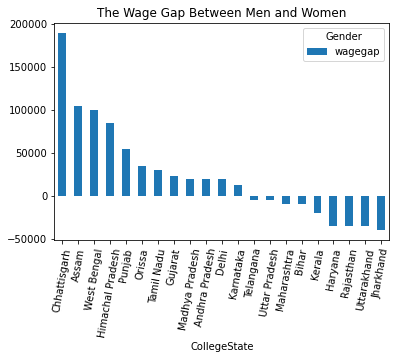

In [165]:
column_wagegap= sortedgenstate.loc[:,['wagegap']]

ax = column_wagegap.plot.bar(rot=80, title="The Wage Gap Between Men and Women")


####  מסקנה 2 - לפי הנתונים מצאנו שהציונים של נשים יותר גבוהים מהציונים של הגברים אך ממוצע השכר שלהן יותר נמוך. כשבדקנו האם יש קשר בין פער השכר לבין המדינה שבה הם חיים (כלומר לפי הג'י די פי) הופתענו שלא מצאנו קשר מובהק.לדוגמא:  ג'הרקאנד (המדינה הממוקמת במקום הכי ימני בטבלה) נמצאת במקום ה19 מתוך 33 במדד הג'י די פי וצ'האטיסגר (המדינה הממוקמת במקום הכי שמאלי בטבלה) נמצאת במקום ה18 מתוך 33 . לכן אנחנו מסיקים שהסיבות לפער אולי קשורות בדברים שלא נמצאים בנתונים כמו תרבות.  

# Conclusion 3 - Relationship between college tier and grades

רצינו לבדוק את הבדל הממוצעים בין האוניברסיטאות היוקרתיות לאומת האוניברסיטאות הרגילות. האוניברסיטאות היוקרתיות המסומנות ב1 והאוניברסיטאות הרגילות המסומנות ב2.

אנחנו שיערנו כי המהנדסים הלומדים באוניברסיטאות בעלות דרג גבוה יותר יקבלו ציונים השווים לאוניברסיטאות בדרג השני או נמוכים יותר (עקב רמת הלימודים) .



In [166]:
tiergroup = sal_df.groupby('CollegeTier')[["10percentage","12percentage","collegeGPA",'Salary']].mean()
tiergroup

,10percentage,12percentage,collegeGPA,Salary
CollegeTier,,,,
1,82.716239,78.745133,74.029912,437500.000000
2,77.254542,73.981999,71.304398,294386.363636


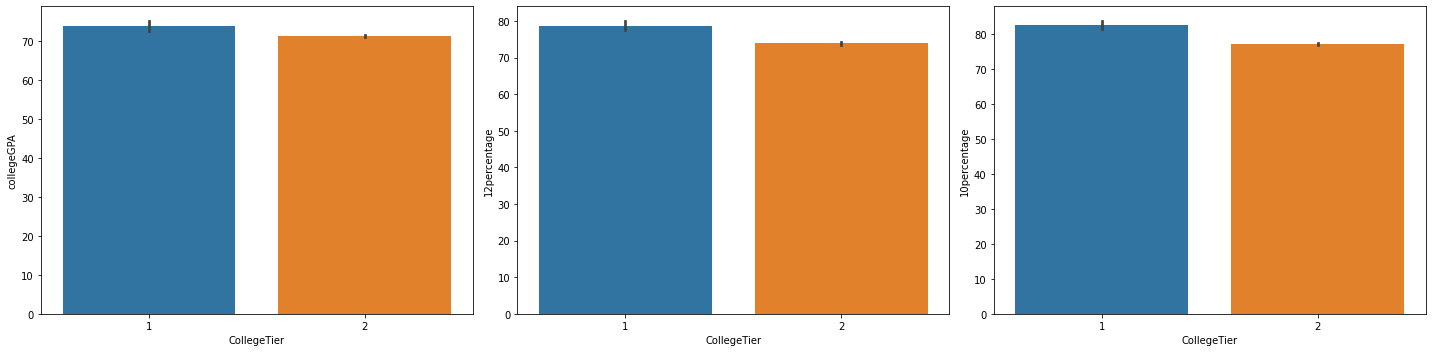

In [167]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.barplot(ax=axes[0], x='CollegeTier', y='collegeGPA', data=sal_df)
sns.barplot(ax=axes[1], x='CollegeTier', y='12percentage', data=sal_df)
sns.barplot(ax=axes[2], x='CollegeTier', y='10percentage', data=sal_df)
for i, ax in enumerate(fig.axes):
    axes[i].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

ניתן לראות בטבלה למעלה שהציונים באוניברסיטאות בדרג הגבוה גבוהים בכל אספקט מהציונים של האוניבסיטאות בעלות הדרג הנמוך יותר.

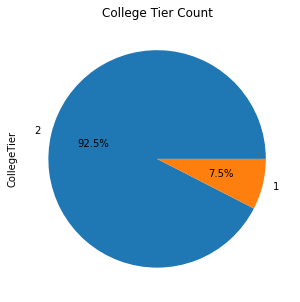

In [168]:
plt.figure(1, figsize=(5,5))
plt.title("College Tier Count")
sal_df['CollegeTier'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

מכיוון שכמות המהנדסים הלומדים בדרג 2 גבוהה בהרבה מהלומדים בדרג 1 רצינו לבצע השוואה שבוחנת את הממצאים שלנו במצב קיצון, והשוונו בין מס' שווה של מהנדסים בכל דרג.

השוונו בין המהנדסים הלומדים בדרג 1 לבין 226 המהנדסים המרוויחים ביותר בדרג 2

In [169]:
Maxsal = sal_df.loc[:,["CollegeTier", "Salary","12percentage", 'collegeGPA','10percentage']]
Maxsal2 = Maxsal.loc[Maxsal.CollegeTier==2]
maxsorted = Maxsal2.sort_values('Salary', ascending=False)

In [170]:
Maxsal1 = Maxsal.loc[Maxsal.CollegeTier==1]
#Maxsal1.count()

In [171]:
Maxsal2short = maxsorted.iloc[0:226]

In [172]:
frames = [Maxsal1,Maxsal2short]
df_keys = pd.concat(frames)

#df_keys

In [173]:
tablemedi = df_keys.groupby('CollegeTier')[["10percentage","12percentage","collegeGPA"]].mean()
tablemedi

,10percentage,12percentage,collegeGPA
CollegeTier,,,
1,82.716239,78.745133,74.029912
2,79.781460,77.607434,73.566062


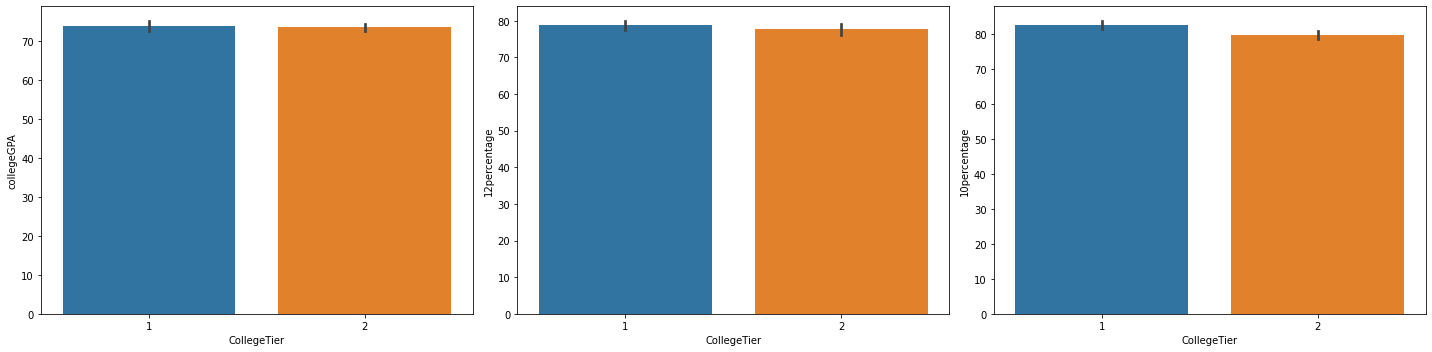

In [174]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.barplot(ax=axes[0], x='CollegeTier', y='collegeGPA', data=df_keys)
sns.barplot(ax=axes[1], x='CollegeTier', y='12percentage', data=df_keys)
sns.barplot(ax=axes[2], x='CollegeTier', y='10percentage', data=df_keys)
for i, ax in enumerate(fig.axes):
    axes[i].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

####  מסקנה 3 - הופתענו לגלות שדווקא המהנדסים שלומדים באוניברסיטאות בדרג הראשון יש ממוצעים הגבוהים מהמהנדסים הלומדים בדרג השני. אנחנו מסיקים כי יכול להיות שהאוניברסיטאות היוקרתיות יותר, נוטות להעלות את הציונים של הסטודנטים שלהם כדי לשפר את מותג האוניברסיטה

# Conclusion 4 - Relationship between College GPA and Salary

דבר נוסף שרצינו לבדוק הוא האם יש קשר בין הציון שבן אדם קיבל באוניברסיטה לבין השכר שהוא יקבל לאחר מכן.
אנחנו שיערנו שיש קשר בין הציון באוניברסיטה לבין השכר

הטבלה למטה משקפת את הקשר בין הציונים בגמר האוניברסיטה לשכר של האנשים שנמצאים באוניברסיטאות היוקרתיות יותר

In [175]:
Maxsal1[['collegeGPA', 'Salary']].corr(method='pearson')

,collegeGPA,Salary
collegeGPA,1.000000,0.057431
Salary,0.057431,1.000000


הטבלה למטה משקפת את הקשר בין הציונים בגמר האוניברסיטה לשכר של האנשים שנמצאים באוניברסיטאות הפחות יוקרתיות 

In [176]:
Maxsal2[['collegeGPA', 'Salary']].corr(method='pearson')

,collegeGPA,Salary
collegeGPA,1.000000,0.129505
Salary,0.129505,1.000000


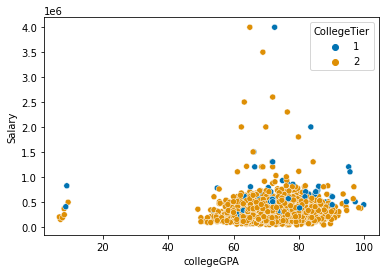

In [177]:
ax = sns.scatterplot(data=sal_df, x="collegeGPA", y="Salary", hue = 'CollegeTier', palette = 'colorblind')

 #### מסקנה 4 - לפי הגרף למעלה והטבלאות ניתן להסיק שהקשר בין ציון בגמר האוניברסיטה לשכר הוא מאוד חלש ולכן קשה להגיד שהציון מנבא הצלחה פיננסית לאחר התואר, ובנוסף קשה למצוא קשר בין דירוג האוניברסיטה לשכר בסוף הלימודים

## Conclusion 5 - University prediction based on the Big Five Test Using Classifier Tree 

לחלק האחרון רצינו לבדוק האם מבחני האישיות מצליחים לנבא לאיזה אוניברסיטה הסטודנט ילך (כלומר האם יש קשר בין תכונות אישיות כלשהם לדרג האוניברסיטה שהסטודנט נמצא בו). 
בדקנו טענה זאת ע"י ניבוי בעזרת עץ החלטה. הבעיה שניתקלנו בה היא שיש הרבה יותר אנשים שהולכים לאוניבסיטאות הפחות יוקרתיות לעומת האנשים שהולכים לאוניברסיטאות היוקרתיות, מה שעלול להשפיע על תוצאות הניבוי. כדי להתגבר על הבעיה הזאת לקחנו 170 אנשים רנדומלים מכל אוניברסיטה וניסינו לנבא לאיזה דרג של אוניברסיטה הם שייכים.

In [178]:
C1 =sal_df.loc[sal_df.CollegeTier==1]
C2 =sal_df.loc[sal_df.CollegeTier==2]

In [179]:
C1samp = C1.sample(n = 170 , random_state = 29)
C2samp = C2.sample(n = 170 , random_state = 29)

In [180]:
frames = [C1samp,C2samp]
df_sampl = pd.concat(frames)

In [181]:
features = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience','English', 'Logical','Quant','Domain','ComputerProgramming', 'ElectronicsAndSemicon','ComputerScience','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
X = df_sampl[features]
y = df_sampl['CollegeTier']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=29) 

In [182]:
def plot_tree(tree_model,feat,size=(31,12)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat,
                   filled=True,
                   rounded = True,
                  fontsize=9)  
    plt.show()

In [183]:
dt = sk.tree.DecisionTreeClassifier(max_depth=5,random_state=29, criterion="gini")
model1 = dt.fit(X_train, y_train)
pred = dt.predict(X_test)

acc = sk.metrics.accuracy_score(pred, y_test)
acc

0.6862745098039216

In [184]:
df = pd.DataFrame(columns = ['CollegeTier', 'predictions'])

In [185]:
df['CollegeTier'] = y_test
df = df.reset_index(drop=True)

In [186]:
df['predictions'] = pd.Series(pred)
df.head()

,CollegeTier,predictions
0,1,2
1,2,2
2,2,1
3,2,1
4,1,1


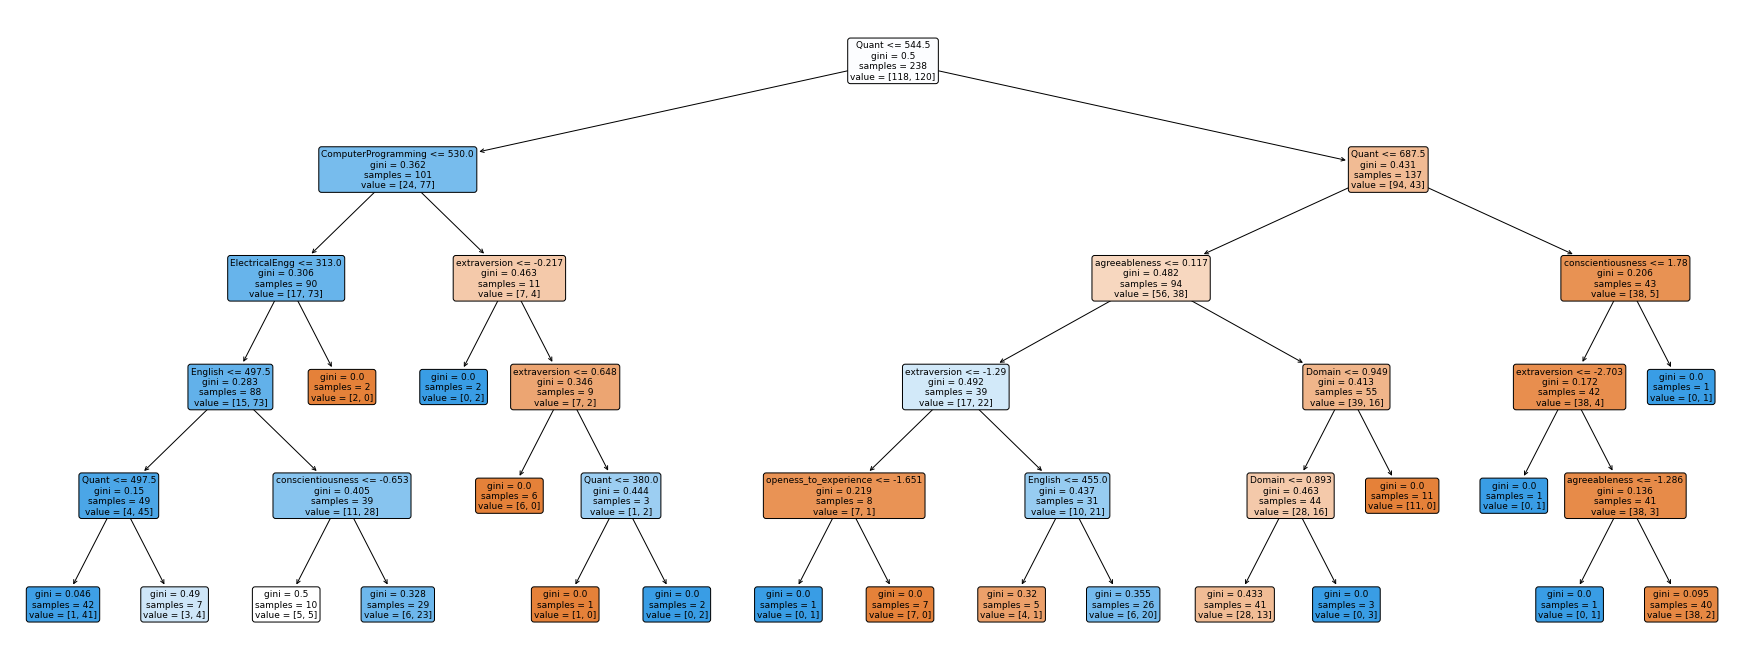

In [187]:
plot_tree(dt,features)


#### מסקנה 5 -  ניתן לראות שהמבחן אישיות יכול לנבא את הדרג של האוניברסיטה ברמה בינונית לכן עדיף להסתמך עליו רק בצורה חלקית (ככלי תומך החלטה). נתון זה יכול לומר למעסיקים פוטנציאלים שאם הם בוחרים להעסיק סטודנטים מאוניברסיטה מסויימת הם יכולים לדעת למה לצפות מבחינת תכונות האישיות.